# Q1: What are missing values in a dataset? Why is it essential to handle missing values? Name some algorithms that are not affected by missing values.

**Missing values** in a dataset are entries or observations where the data is absent or undefined for one or more attributes or features. Missing values can occur for various reasons, including data collection errors, sensor malfunctions, or simply because the data was not recorded or provided. 

It is essential to handle missing values for several reasons:

1. **Data Quality**: Missing data can lead to inaccurate and biased analysis, reducing the quality and reliability of the results.

2. **Model Performance**: Machine learning models often struggle to handle missing values. They may produce incorrect predictions or be unable to make predictions at all.

3. **Information Loss**: Ignoring missing data can lead to the loss of valuable information and potentially important patterns in the dataset.

4. **Biased Results**: The presence of missing data may introduce bias into statistical analyses, leading to incorrect conclusions and inferences.

Some algorithms that are not affected by missing values include:

1. **Tree-Based Models (e.g., Decision Trees, Random Forests, Gradient Boosting)**: Tree-based models can naturally handle missing values. They can split nodes based on available features and do not require imputation.

2. **K-Nearest Neighbors (K-NN)**: K-NN can work with missing values by only considering available features when calculating distances between data points.

3. **Sparse Models (e.g., L1-Regularized Regression)**: These models automatically select relevant features, effectively ignoring missing values.

4. **Naive Bayes**: Naive Bayes models can handle missing data because they compute conditional probabilities based on available features.

5. **Support Vector Machines (SVM)**: SVMs can accommodate missing values, but it's crucial to ensure that the choice of kernel and kernel parameters is appropriate.

While these algorithms can work with missing data, it's still important to consider the impact of missing values on the overall quality of your analysis and explore techniques for handling missing data, such as imputation or data preprocessing, when necessary.

# Q2: List down techniques used to handle missing data. Give an example of each with python code.

1. Deleting Rows with missing values
2. mean value imputation
3. medain value imputation

In [ ]:
# 1. Deleting Rows with missing values 

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped.

In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
print(df.isnull().sum())
print(df.shape)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
(891, 15)


In [15]:
# Columns wise deletion
df.dropna().shape

(182, 15)

In [18]:
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


2. Impute missing values with Mean/Median:

In [19]:
# 2. Mean value imputation

<AxesSubplot:xlabel='age', ylabel='Count'>

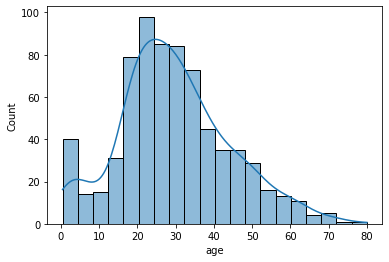

In [22]:
sns.histplot(df['age'], kde=1)

In [24]:
df['mean_age']=df['age'].fillna(df['age'].mean())

In [29]:
df[['mean_age', 'age']]    # mean values work when the value is normally ditributed

,mean_age,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [42]:
#3. median value imputaion
df["median_age"]=df['age'].fillna(df['age'].median())

In [33]:
df[['median_age', 'mean_age', 'age']]

,median_age,mean_age,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


## Q3: Explain the imbalanced data. What will happen if imbalanced data is not handled?

Imbalanced data is a common issue in machine learning and data analysis where the distribution of classes or categories within a dataset is not equal. In other words, one class (the minority class) has significantly fewer instances than another class (the majority class). This imbalance can occur in various types of datasets, such as binary classification problems (e.g., fraud detection, disease diagnosis) and multi-class classification problems (e.g., sentiment analysis, image recognition). 

Here's an example to illustrate imbalanced data:

Suppose you are working on a binary classification problem to identify fraudulent credit card transactions:

- Class A: Legitimate transactions (majority class) - 95% of the data.
- Class B: Fraudulent transactions (minority class) - 5% of the data.

The imbalance in this case means that you have much fewer examples of fraudulent transactions compared to legitimate ones.

If imbalanced data is not handled appropriately, several issues can arise:

1. **Biased Model:** Machine learning algorithms tend to be biased towards the majority class, as they aim to minimize overall error. This means that the model may perform well in classifying the majority class but poorly in identifying the minority class. In the example above, a model might become overly optimistic in predicting transactions as legitimate because it's the safest bet in terms of overall accuracy.

2. **Poor Generalization:** Imbalanced data can lead to models that do not generalize well to new, unseen data, especially in the minority class. This is because the model is essentially overfitting to the majority class and may not capture the patterns and characteristics of the minority class.

3. **Loss of Critical Information:** In real-world scenarios, the minority class often represents the class of interest, which may be associated with critical or costly consequences (e.g., fraud detection, disease diagnosis). Failing to handle imbalanced data can lead to missed instances of the minority class, potentially resulting in significant financial, safety, or security implications.

Handling imbalanced data is essential for developing fair and effective machine learning models, especially in applications where the cost of false negatives (missing instances of the minority class) is high. The choice of technique depends on the specific problem, dataset, and the desired trade-off between precision, recall, and overall model performance.

# Q4: What are Up-sampling and Down-sampling? Explain with an example when up-sampling and down-sampling are required.

Up-sampling and down-sampling are techniques used to address the issue of imbalanced data in machine learning. These methods are applied to balance the distribution of classes in the dataset, particularly when one class is underrepresented (minority class) compared to another (majority class).

1. **Up-Sampling (Over-Sampling):**
   Up-sampling involves increasing the number of instances in the minority class to make it more proportionate to the majority class. This can be achieved through various methods, such as duplicating existing minority class samples, generating synthetic samples, or using a combination of both.

   **Example for Up-Sampling:**
   Let's consider a binary classification problem for fraud detection, where you have a highly imbalanced dataset:

   - Legitimate Transactions (Majority Class): 9,000 instances
   - Fraudulent Transactions (Minority Class): 100 instances

   In this case, you can perform up-sampling by generating synthetic samples for the minority class using a technique like SMOTE (Synthetic Minority Over-sampling Technique). This increases the number of fraudulent transactions, making it closer in size to the legitimate transactions. After up-sampling, the dataset may look like this:

   - Legitimate Transactions: 9,000 instances
   - Fraudulent Transactions: 9,000 instances (generated through up-sampling)

   Up-sampling helps balance the class distribution and reduces the bias of the model towards the majority class.

2. **Down-Sampling (Under-Sampling):**
   Down-sampling involves reducing the number of instances in the majority class to make it closer in size to the minority class. This can be done by randomly removing some samples from the majority class.

   **Example for Down-Sampling:**
   Consider a scenario where you are working on a customer churn prediction problem:

   - Non-Churn Customers (Majority Class): 10,000 instances
   - Churned Customers (Minority Class): 200 instances

   In this case, you can perform down-sampling by randomly removing some non-churn customer samples, making the class distribution more balanced. After down-sampling, the dataset may look like this:

   - Non-Churn Customers: 200 instances (randomly selected from the majority class)
   - Churned Customers: 200 instances

   Down-sampling can help reduce the risk of overfitting to the majority class while maintaining a balanced dataset.

**When to Use Up-Sampling and Down-Sampling:**

1. **Up-Sampling:**
   - Use up-sampling when the minority class is underrepresented, and you want to increase the number of instances in that class.
   - It's suitable when you have a relatively small dataset, and generating synthetic samples can help balance the class distribution without significantly increasing the dataset size.

   In the fraud detection example, up-sampling is useful when you have a limited number of fraudulent transactions, and you want to balance the dataset to train a more effective model.

2. **Down-Sampling:**
   - Use down-sampling when the majority class is substantially larger, and you want to reduce its size to balance the class distribution.
   - It's appropriate when you have a large dataset, and removing some instances from the majority class won't result in a significant loss of information.

   In the customer churn prediction example, down-sampling is suitable when you want to avoid the model becoming biased towards the majority class, and you have enough data in the majority class to down-sample from.

The choice between up-sampling and down-sampling depends on your specific dataset, problem, and the trade-offs you are willing to make in terms of dataset size and potential information loss. In some cases, a combination of both techniques may be the most effective approach.

# Q5: What is data Augmentation? Explain SMOTE.

**Data Augmentation:**

Data augmentation is a technique commonly used in machine learning and computer vision to artificially increase the size of a dataset by applying various transformations to the existing data. These transformations can include operations like rotation, flipping, cropping, scaling, adding noise, and more, depending on the type of data and the problem you're working on.

The primary purpose of data augmentation is to create additional training examples that are variations of the original data. This helps improve the robustness and generalization of machine learning models, especially in cases where the dataset is limited. By exposing the model to a more diverse set of data, it can learn to perform better on unseen examples.

For instance, in image classification tasks, data augmentation can involve flipping, rotating, or slightly distorting images, effectively generating more training examples from the existing images. This can make the model more invariant to variations in the input data.

**SMOTE:**

SMOTE is a technique used in machine learning to address imbalanced dataset where the minority class has signifucally fewer instance then the majority class.

SMOTE invovles generating sysnthetic instances of the majority class by interpolating the existing instances.

# Q6: What are outliers in a dataset? Why is it essential to handle outliers?

**Outliers** in a dataset are data points that are significantly different from the majority of the data. They are extreme values that lie far from the central tendency of the data, either on the high or low end of the distribution. Outliers can be caused by errors, anomalies, or rare events and have the potential to distort statistical analysis, machine learning models, and data visualizations. It's important to identify and handle outliers to ensure the accuracy and reliability of data-driven insights and predictions.

It is essential to detect and handle outliers appropriately to ensure the accuracy and validity of machine learning models. Outliers can provide valuable insights into the data, but they can also lead to biased or incorrect results if not handled appropriately. Therefore, it is crucial to investigate the causes of outliers and understand their impact on the analysis before taking any action.

# Q7: You are working on a project that requires analyzing customer data. However, you notice that some of the data is missing. What are some techniques you can use to handle the missing data in your analysis?

**1. Data Imputation:**

**Mean/Median/Mode Imputation:** Replace missing values with the mean (average), median, or mode of the available data for that variable.

**Regression Imputation:** Use regression models to predict missing values based on the relationship with other variables.

**K-Nearest Neighbors (KNN):** Replace missing values with the average of K-nearest data points based on other features.

**2. Deletion:**

**Listwise Deletion:** Remove entire rows with missing data. This is a straightforward approach but can lead to a significant loss of information.

**Pairwise Deletion:** Analyze available data on a variable-by-variable basis. It keeps data for analysis even if other variables have missing values.

# Q8: You are working with a large dataset and find that a small percentage of the data is missing. What are some strategies you can use to determine if the missing data is missing at random or if there is a pattern to the missing data?

**Missing Data Patterns:**

Categorize the patterns of missing data. Common patterns include:

**Missing Completely at Random (MCAR):** When the missingness is unrelated to the observed or unobserved data.

**Missing at Random (MAR):** When the missingness is related to the observed data but not the missing values themselves.

**Missing Not at Random (MNAR):** When the missingness is related to the missing values.

# Q9: Suppose you are working on a medical diagnosis project and find that the majority of patients in the dataset do not have the condition of interest, while a small percentage do. What are some strategies you can use to evaluate the performance of your machine learning model on this imbalanced dataset?

When dealing with imbalanced datasets in a medical diagnosis project where the majority of patients do not have the condition of interest, it's important to use evaluation strategies that account for this class imbalance. Here are some key strategies you can use to evaluate the performance of your machine learning model:

1. **Confusion Matrix Analysis:**
   - Calculate the confusion matrix to understand true positives, true negatives, false positives, and false negatives.
   - Compute standard metrics such as accuracy, precision, recall (sensitivity), specificity, and F1-score. These metrics provide a more detailed view of your model's performance.

2. **Receiver Operating Characteristic (ROC) Curve:**
   - Plot an ROC curve to visualize the trade-off between sensitivity (true positive rate) and specificity (true negative rate).
   - Calculate the area under the ROC curve (AUC-ROC) to assess the model's ability to discriminate between classes.

3. **Stratified Cross-Validation:**
   - Employ stratified k-fold cross-validation to ensure that each fold maintains the class distribution in both training and testing sets. This helps provide more robust performance estimates.

4. **Resampling Techniques:**
   - Oversample the minority class or undersample the majority class to balance the dataset. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be particularly helpful.

5. **Cost-sensitive Learning:**
   - Modify your machine learning algorithm to consider the class imbalance by assigning different misclassification costs to different classes. This is especially useful in situations where the misclassification of one class is more costly or critical.

6. **Ensemble Methods:**
   - Employ ensemble methods such as Random Forest, AdaBoost, or Gradient Boosting, which can be more robust to class imbalances by combining multiple models.

7. **Anomaly Detection:**
   - Consider treating the problem as an anomaly detection task, with the minority class representing the "anomaly." Anomaly detection algorithms can be effective in these situations.

8. **Feature Engineering:**
    - Carefully select or engineer features that may help the model better discriminate between classes. Expertly chosen features can improve model performance.

9. **Collect More Data:**
    - If possible, collect more data, especially from the minority class, to enhance the model's ability to learn from both classes.

10. **Regularization and Hyperparameter Tuning:**
    - Experiment with different regularization techniques and hyperparameter settings to optimize the model's performance.

11. **Domain Expertise:**
    - Collaborate with domain experts to refine the problem formulation and model evaluation, as they can provide valuable insights into the importance of different types of errors in the context of medical diagnosis.

12. **Cost-Benefit Analysis:**
    - Conduct a cost-benefit analysis to understand the potential real-world impact of model decisions. This can help determine the optimal decision threshold and model evaluation strategy.

Selecting the most suitable strategy or combination of strategies depends on the specifics of your dataset and the project's requirements. Careful evaluation and comparison of model performance using these techniques will help you make informed decisions about model selection and optimization in a medical diagnosis project with imbalanced data.

# Q10: When attempting to estimate customer satisfaction for a project, you discover that the dataset is unbalanced, with the bulk of customers reporting being satisfied. What methods can you employ to balance the dataset and down-sample the majority class?

Balancing an imbalanced dataset, where one class is significantly more prevalent than the other, is important in various machine learning tasks to prevent model bias towards the majority class. In your case, if you want to estimate customer satisfaction for a project and the majority of customers report being satisfied, you can employ several methods to balance the dataset by down-sampling the majority class. Here are some common techniques:

1. **Random Under-sampling**: In this approach, you randomly remove instances from the majority class until the dataset is balanced. This can be effective, but it may lead to a loss of important information if not done carefully.


2. **Cluster Centroids**: Use clustering techniques like K-means to identify centroids of clusters in the majority class. Then, replace these centroids with a single instance, balancing the dataset.


3. **Synthetic Minority Over-sampling Technique (SMOTE)**: Rather than under-sampling the majority class, SMOTE generates synthetic instances for the minority class by interpolating between existing minority class instances. This can help balance the dataset without losing information.

4. **Adasyn (Adaptive Synthetic Sampling)**: Adasyn is an extension of SMOTE that generates more synthetic examples for the minority class where it's harder to learn the decision boundary.

5. **Random Over-sampling**: In some cases, you might oversample the minority class by creating copies of minority class instances. However, this can lead to overfitting.

6. **Combining Sampling Techniques**: You can also combine over-sampling and under-sampling methods to achieve a balance.

# Q11: You discover that the dataset is unbalanced with a low percentage of occurrences while working on a project that requires you to estimate the occurrence of a rare event. What methods can you employ to balance the dataset and up-sample the minority class?

When dealing with an imbalanced dataset where a rare event has a low percentage of occurrences, it's crucial to balance the dataset by up-sampling the minority class. This helps to prevent bias in your model's predictions and improve its ability to correctly identify the rare event. Here are some methods you can employ to up-sample the minority class:

1. **Random Over-sampling**: In this method, you randomly duplicate instances from the minority class until a balance is achieved. While it's a simple technique, it can lead to overfitting if not applied carefully.

2. **SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE generates synthetic instances for the minority class by creating new data points interpolated between existing minority class instances. This approach helps balance the dataset without merely duplicating existing data points.

3. **SMOTE-ENN**: This combines SMOTE for over-sampling with Edited Nearest Neighbors (ENN) for under-sampling. SMOTE is applied first, and then ENN is used to clean the dataset.

4. **SMOTE-Tomek**: Similar to SMOTE-ENN, this combines SMOTE with Tomek links to remove undesired instances from the majority class.

5. **Borderline SMOTE**: This variant of SMOTE gives preference to borderline instances, which are those minority class instances that are close to the decision boundary.

6. **Random Sampling with Replacement**: In some cases, you may choose to randomly sample the minority class with replacement to achieve balance.

7. **Duplicating Minority Instances with Minor Variations**: Create new instances in the minority class by introducing minor variations or perturbations to existing data points.

8. **Collecting More Data**: If possible, consider collecting more data for the minority class, which can help improve the representation of the rare event.

9. **Ensemble Methods**: Use ensemble techniques like EasyEnsemble or BalanceCascade, which create multiple balanced subsets of the data and train models on them. Then, combine the results for improved predictive accuracy.
